In [1]:
#Importing various utilities and libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Read training data
df=pd.read_excel("Train Data.xlsx")
df.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,51,retired,married,primary,no,229,yes,no,5,may,353,1,-1,0,unknown,0
4,57,blue-collar,married,primary,no,52,yes,no,5,may,38,1,-1,0,unknown,0


In [3]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
connect       0
balance       0
landline      0
smart         0
last_day      0
last_month    0
duration      0
campaign      0
passdays      0
previous      0
poutcome      0
target        0
dtype: int64

In [4]:
df = df[df.education != "unknown"]

In [5]:
#Converts all the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['connect']=le.fit_transform(df['connect'])
df['landline']=le.fit_transform(df['landline'])
df['smart']=le.fit_transform(df['smart'])
df['last_month']=le.fit_transform(df['last_month'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [6]:
#Split dataframe into Input(X) and Output(Y)
X=df.loc[:, df.columns !='target']
Y=df.loc[:,df.columns == 'target']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.10431168 0.05710417 0.02345374 0.02500529 0.00267591 0.10281656
 0.02529568 0.00751719 0.10153962 0.09902577 0.25554274 0.06377042
 0.05174988 0.02535746 0.0548339 ]


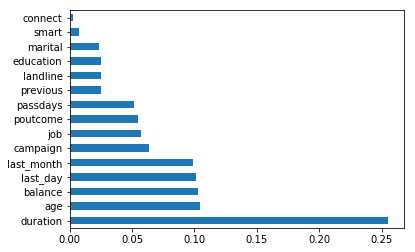

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [19]:
#Dropped column connect due to least influence on dependent variable target
X=X.loc[:, X.columns !='connect']
X=X.loc[:, X.columns !='smart']
X=X.loc[:, X.columns !='education']
X=X.loc[:, X.columns !='landline']
X=X.loc[:, X.columns !='poutcome']

In [20]:
#Read and dislay Validation data
dataset=pd.read_excel("Validate Data.xlsx")
dataset.head()
dataset = dataset[dataset.education != "unknown"]

In [21]:
#Convert categorical data into numerical values with label encoder
dataset['job']=le.fit_transform(dataset['job'])
dataset['marital']=le.fit_transform(dataset['marital'])
dataset['education']=le.fit_transform(dataset['education'])
dataset['connect']=le.fit_transform(dataset['connect'])
dataset['landline']=le.fit_transform(dataset['landline'])
dataset['smart']=le.fit_transform(dataset['smart'])
dataset['last_month']=le.fit_transform(dataset['last_month'])
dataset['poutcome']=le.fit_transform(dataset['poutcome'])

In [22]:
#Split into input, output; remove Connect column
X_val=dataset.loc[:,dataset.columns != 'target']
X_val=X_val.loc[:,X_val.columns != 'connect']
X_val=X_val.loc[:,X_val.columns != 'smart']
X_val=X_val.loc[:,X_val.columns != 'education']
X_val=X_val.loc[:,X_val.columns != 'landline']
X_val=X_val.loc[:,X_val.columns != 'poutcome']
Y_val=dataset.loc[:,dataset.columns =='target']

In [23]:
#Create a random forest classifier and train model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
#Perform predictions on validation
y_pred = classifier.predict(X_val)
print(y_pred)

[0 0 0 ... 0 0 0]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(accuracy_score(Y_val, y_pred))

[[3814   18]
 [  41  461]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3832
           1       0.96      0.92      0.94       502

   micro avg       0.99      0.99      0.99      4334
   macro avg       0.98      0.96      0.97      4334
weighted avg       0.99      0.99      0.99      4334

0.9863867097369635


In [26]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

roc_auc_score(Y_val, y_pred)

0.9568147036072828

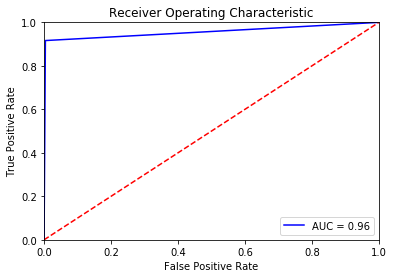

In [16]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
#For comparison, we use Naive Bayes :
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X, Y) 
y_pred = gnb.predict(X_val) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(accuracy_score(Y_val, y_pred))

[[3525  307]
 [ 325  177]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3832
           1       0.37      0.35      0.36       502

   micro avg       0.85      0.85      0.85      4334
   macro avg       0.64      0.64      0.64      4334
weighted avg       0.85      0.85      0.85      4334

0.8541762805722196


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


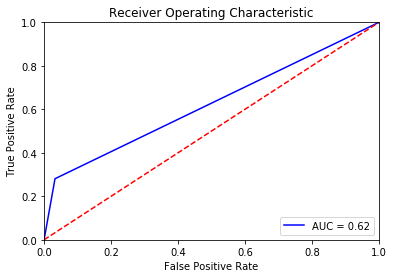

In [60]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
#TEST DATA
test=pd.read_excel("ENTER YOUR TEST FILE PATH HERE")
test.head()
test = test[test.education != "unknown"]
#Convert categorical data into numerical values with label encoder
test['job']=le.fit_transform(test['job'])
test['marital']=le.fit_transform(test['marital'])
test['education']=le.fit_transform(test['education'])
test['connect']=le.fit_transform(test['connect'])
test['landline']=le.fit_transform(test['landline'])
test['smart']=le.fit_transform(test['smart'])
test['last_month']=le.fit_transform(test['last_month'])
test['poutcome']=le.fit_transform(test['poutcome'])

X_test=dataset.loc[:,test.columns != 'target']
X_test=X_test.loc[:,X_test.columns != 'connect']
Y_test=test.loc[:,test.columns =='target']
preds = classifier.predict(X_test)
print(preds)
print(confusion_matrix(Y_test,preds))
print(classification_report(Y_test,preds))
print(accuracy_score(Y_test, preds))

[0 0 0 ... 0 0 0]
[[3817   15]
 [  41  461]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3832
           1       0.97      0.92      0.94       502

   micro avg       0.99      0.99      0.99      4334
   macro avg       0.98      0.96      0.97      4334
weighted avg       0.99      0.99      0.99      4334

0.9870789109367789
